In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
local_zip = 'catdog.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/dataset')
zip_ref.close()

In [3]:
print(len(os.listdir('/dataset/PetImages/Cat/')))
print(len(os.listdir('/dataset/PetImages/Dog/')))

12501
12501


In [6]:
try:
    os.mkdir('dataset/cats-v-dogs')
    os.mkdir('dataset/cats-v-dogs/training')
    os.mkdir('dataset/cats-v-dogs/testing')
    os.mkdir('dataset/cats-v-dogs/training/cats')
    os.mkdir('dataset/cats-v-dogs/training/dogs')
    os.mkdir('dataset/cats-v-dogs/testing/cats')
    os.mkdir('dataset/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "dataset/PetImages/Cat/"
TRAINING_CATS_DIR = "dataset/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "dataset/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "dataset/PetImages/Dog/"
TRAINING_DOGS_DIR = "dataset/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "dataset/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [8]:
print(len(os.listdir('dataset/cats-v-dogs/training/cats/')))
print(len(os.listdir('dataset/cats-v-dogs/training/dogs/')))
print(len(os.listdir('dataset/cats-v-dogs/testing/cats/')))
print(len(os.listdir('dataset/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [10]:
TRAINING_DIR = "dataset/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "dataset/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 225 steps, validate for 25 steps
Epoch 1/50
 47/225 [=====>........................] - ETA: 2:40 - loss: 0.8354 - acc: 0.5674

C:\Users\Herman\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Herman\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Herman\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Herman\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Herman\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin

225/225 [==============================] - 161s 717ms/step - loss: 0.6555 - acc: 0.6514 - val_loss: 0.5411 - val_acc: 0.7244
Epoch 2/50
225/225 [==============================] - 146s 649ms/step - loss: 0.4977 - acc: 0.7590 - val_loss: 0.4632 - val_acc: 0.7788
Epoch 3/50
225/225 [==============================] - 148s 657ms/step - loss: 0.4260 - acc: 0.8028 - val_loss: 0.4455 - val_acc: 0.7948
Epoch 4/50
225/225 [==============================] - 147s 653ms/step - loss: 0.3638 - acc: 0.8347 - val_loss: 0.4245 - val_acc: 0.8124
Epoch 5/50
225/225 [==============================] - 148s 659ms/step - loss: 0.3021 - acc: 0.8689 - val_loss: 0.4164 - val_acc: 0.8172
Epoch 6/50
225/225 [==============================] - 148s 656ms/step - loss: 0.2398 - acc: 0.8997 - val_loss: 0.4604 - val_acc: 0.8320
Epoch 7/50
225/225 [==============================] - 149s 664ms/step - loss: 0.1669 - acc: 0.9334 - val_loss: 0.5053 - val_acc: 0.8204
Epoch 8/50
225/225 [==============================] - 148s 

<Figure size 432x288 with 0 Axes>

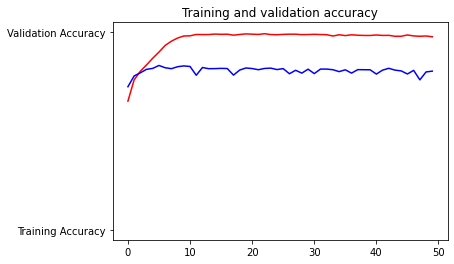

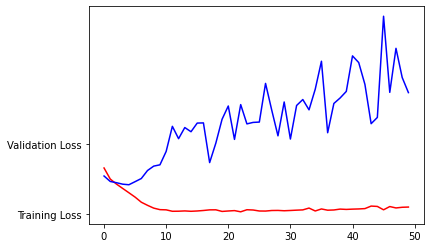

<Figure size 432x288 with 0 Axes>

In [12]:

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

path = "dog/cat8.jpg"
# assert os.path.isfile(path)
# f = open(path, "r")

# # predicting images
# path = 'dog'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(path + " is a dog")
else:
    print(path + " is a cat")

[1.]
dog/cat8.jpg is a dog
